###  1

In [1]:
import pandas as pd

# Load the data i
df = pd.read_csv('Country-data.csv')

# Print the header of the DataFrame to see the columns
df.head()

,country,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp
0,Afghanistan,90.2,10.0,7.58,44.9,1610,9.44,56.2,5.82,553
1,Albania,16.6,28.0,6.55,48.6,9930,4.49,76.3,1.65,4090
2,Algeria,27.3,38.4,4.17,31.4,12900,16.10,76.5,2.89,4460
3,Angola,119.0,62.3,2.85,42.9,5900,22.40,60.1,6.16,3530
4,Antigua and Barbuda,10.3,45.5,6.03,58.9,19100,1.44,76.8,2.13,12200


### Column Descriptions and Observations

- **Column 1**: Description of column 1.
- **Column 2**: Description of column 2.
- **Column 3**: Description of column 3.

Observations:
- Observation 1
- Observation 2
- Observation 3

In [2]:
# Check for missing values and data types
df.info()

# Check for duplicate rows
duplicate_count = df.duplicated().sum()
print(f"Number of duplicate rows: {duplicate_count}")

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 167 entries, 0 to 166
Data columns (total 10 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   country     167 non-null    object 
 1   child_mort  167 non-null    float64
 2   exports     167 non-null    float64
 3   health      167 non-null    float64
 4   imports     167 non-null    float64
 5   income      167 non-null    int64  
 6   inflation   167 non-null    float64
 7   life_expec  167 non-null    float64
 8   total_fer   167 non-null    float64
 9   gdpp        167 non-null    int64  
dtypes: float64(7), int64(2), object(1)
memory usage: 13.2+ KB
Number of duplicate rows: 0


In [3]:
# Fix missing values
# Here, we will fill missing values with the mean of each column for simplicity
df.fillna(df.mean(numeric_only=True), inplace=True)

# Remove duplicate rows
df.drop_duplicates(inplace=True)

# Handle missing values (e.g., fill with mean)
df.fillna(df.mean(numeric_only=True), inplace=True)

# Drop the 'country' column and store it in a separate DataFrame
df_country = df[['country']]
df_features = df.drop(columns=['country'])

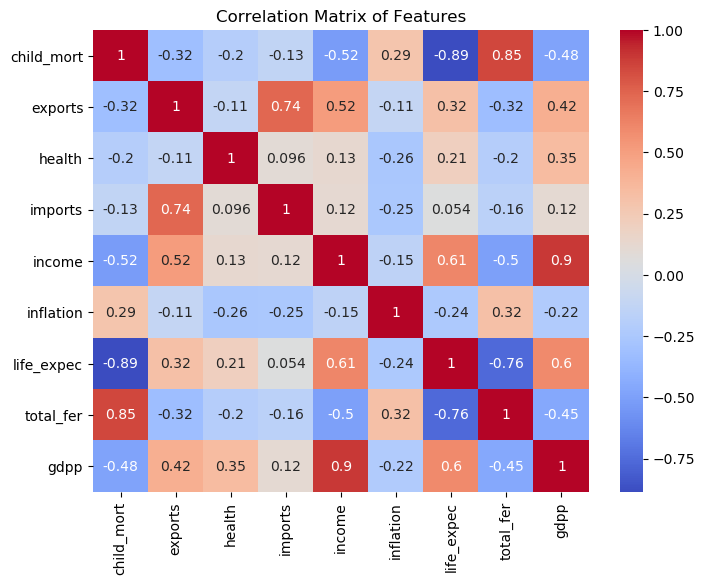

In [4]:
import matplotlib.pyplot as plt
import seaborn as sns

# Display the correlation matrix using a heatmap
plt.figure(figsize=(8, 6))
correlation_matrix = df_features.corr()
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm')
plt.title('Correlation Matrix of Features')
plt.show()

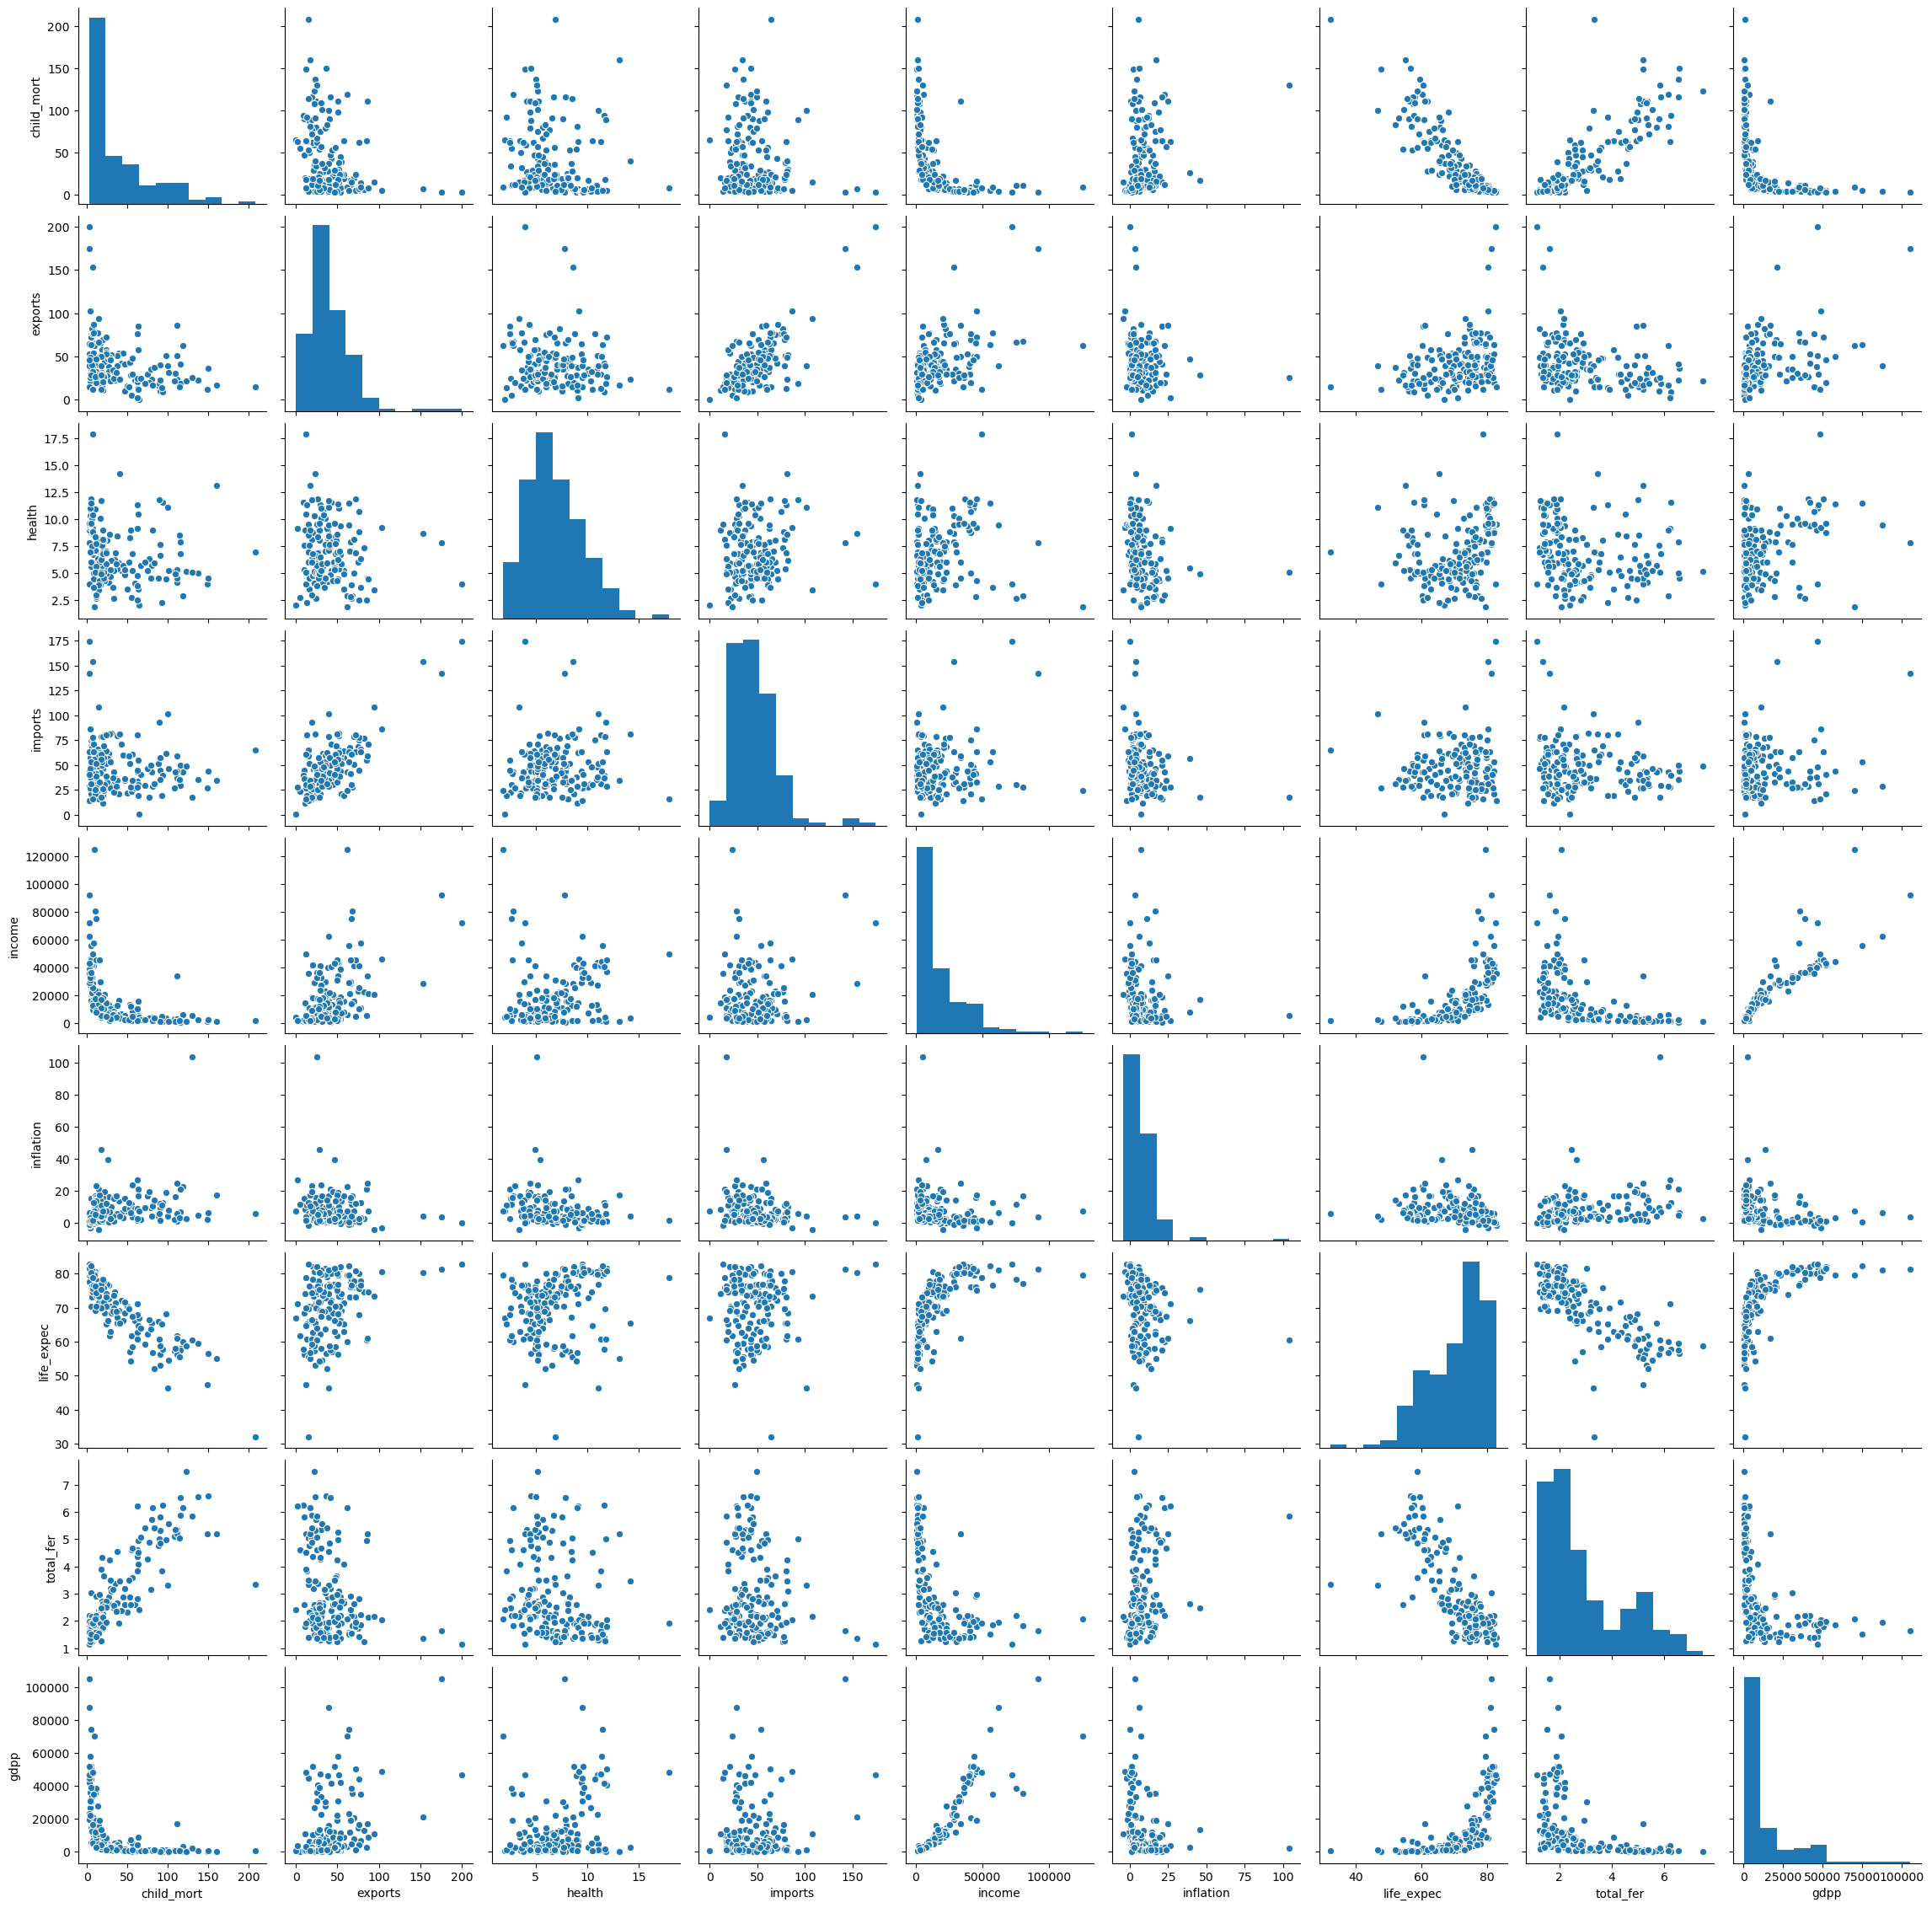

In [5]:
# Generate scatter plots and histograms using pairplot
sns.pairplot(df_features)
plt.show()

### 2

In [6]:
from sklearn.preprocessing import StandardScaler

In [7]:
# Initialize the scaler
scaler = StandardScaler()

# Scale the numerical data
scaled_data = scaler.fit_transform(df_features)

# Print the first 5 rows of the scaled data
print("Scaled Data:\n", scaled_data[:5])

Scaled Data:
 [[ 1.29153238 -1.13827979  0.27908825 -0.08245496 -0.8082454   0.15733622
  -1.61909203  1.90288227 -0.67917961]
 [-0.5389489  -0.47965843 -0.09701618  0.07083669 -0.3753689  -0.31234747
   0.64786643 -0.85997281 -0.48562324]
 [-0.27283273 -0.09912164 -0.96607302 -0.64176233 -0.22084447  0.78927429
   0.67042323 -0.0384044  -0.46537561]
 [ 2.00780766  0.77538117 -1.44807093 -0.16531531 -0.58504345  1.38705353
  -1.17923442  2.12815103 -0.51626829]
 [-0.69563412  0.1606679  -0.28689415  0.4975675   0.10173177 -0.60174853
   0.70425843 -0.54194633 -0.04181713]]


In [8]:
from sklearn.cluster import KMeans
from yellowbrick.cluster import SilhouetteVisualizer

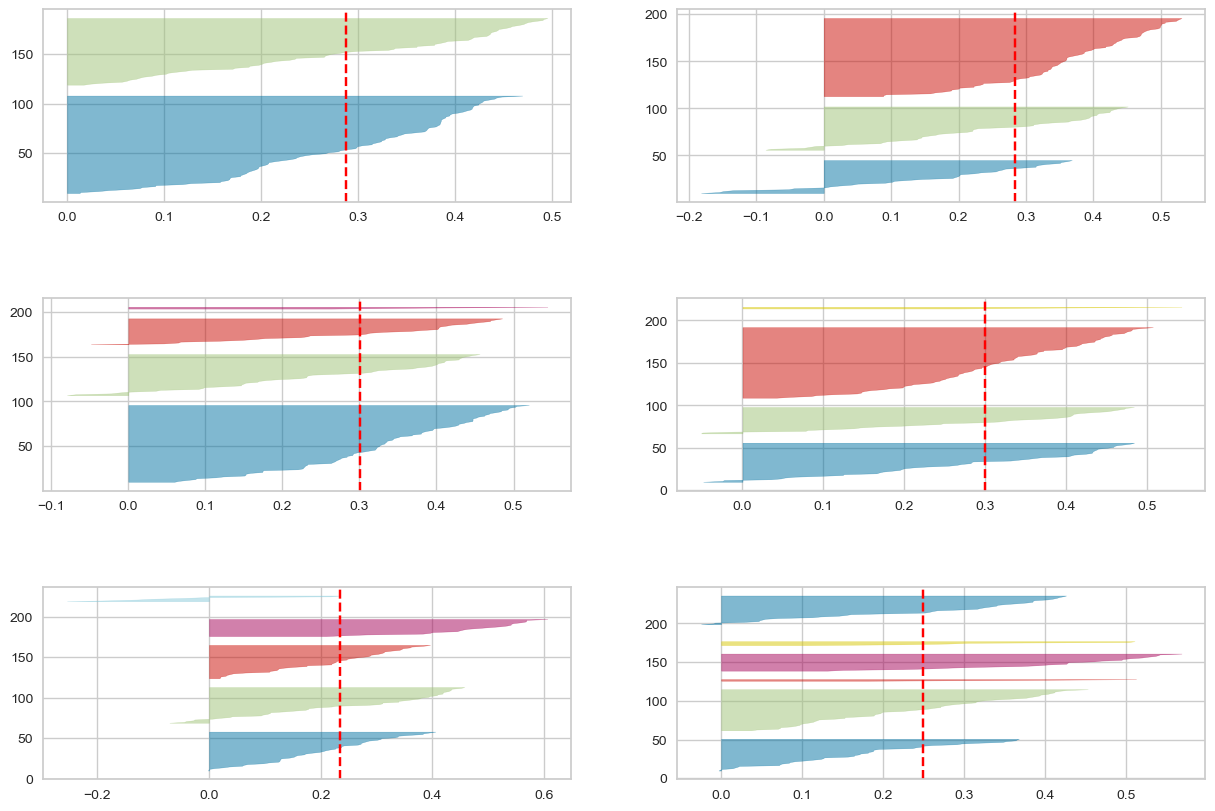

In [9]:
# Silhouette visualization for different values of n_clusters
fig, ax = plt.subplots(3, 2, figsize=(15, 10))
plt.subplots_adjust(hspace=0.5)

for i in [2, 3, 4, 5, 6, 7]:
    # Create KMeans instance for different number of clusters
    kmeans = KMeans(n_clusters=i, init='k-means++', n_init=10, max_iter=100, random_state=42)
    
    # Determine position in subplot grid
    q, mod = divmod(i, 2)
    
    # Create SilhouetteVisualizer instance with KMeans
    visualizer = SilhouetteVisualizer(kmeans, colors='yellowbrick', ax=ax[q-1][mod])
    
    # Fit the visualizer to the scaled data
    visualizer.fit(scaled_data)

# Display the silhouette visualizations
plt.show()

For n_clusters = 2, the silhouette score is 0.28735668921406704
For n_clusters = 3, the silhouette score is 0.28329575683463126
For n_clusters = 4, the silhouette score is 0.3021082505899252
For n_clusters = 5, the silhouette score is 0.22327899566511256
For n_clusters = 6, the silhouette score is 0.23057357437984735
For n_clusters = 7, the silhouette score is 0.25179867083491136
For n_clusters = 8, the silhouette score is 0.22248886492792302
For n_clusters = 9, the silhouette score is 0.23530641350791914
For n_clusters = 10, the silhouette score is 0.21959393524208184


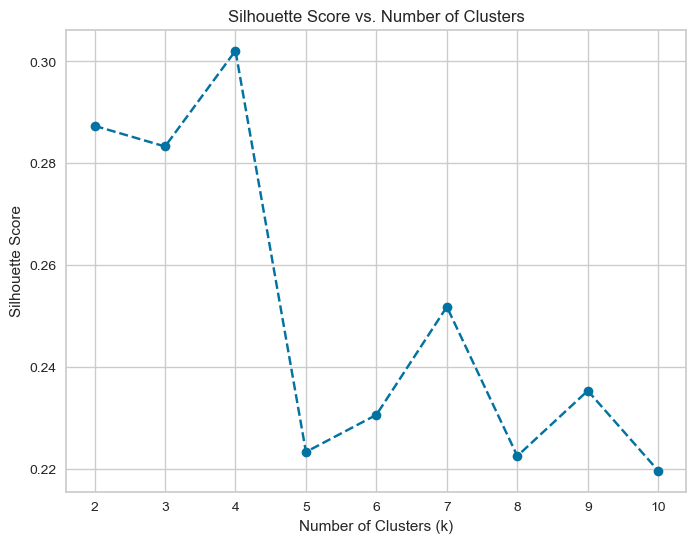

In [10]:
from sklearn.metrics import silhouette_score

# Calculate silhouette scores for different values of n_clusters
silhouette_scores = []
cluster_range = range(2, 11)

for n_clusters in cluster_range:
    kmeans = KMeans(n_clusters=n_clusters, init='k-means++', n_init=10, max_iter=300, random_state=0)
    cluster_labels = kmeans.fit_predict(scaled_data)
    silhouette_avg = silhouette_score(scaled_data, cluster_labels)
    silhouette_scores.append(silhouette_avg)
    print(f"For n_clusters = {n_clusters}, the silhouette score is {silhouette_avg}")

# Plot silhouette score vs. n_clusters
plt.figure(figsize=(8, 6))
plt.plot(cluster_range, silhouette_scores, marker='o', linestyle='--', color='b')
plt.title('Silhouette Score vs. Number of Clusters')
plt.xlabel('Number of Clusters (k)')
plt.ylabel('Silhouette Score')
plt.grid(True)
plt.show()

In [11]:
import numpy as np

# Find the number of clusters with the highest silhouette score
best_n_clusters = cluster_range[np.argmax(silhouette_scores)]
print(f"The best number of clusters based on the silhouette score is: {best_n_clusters}")

# Fit the best KMeans model
best_kmeans = KMeans(n_clusters=best_n_clusters, init='k-means++', n_init=10, max_iter=300, random_state=0)
best_kmeans.fit(scaled_data)
df_features['Cluster'] = kmeans.fit_predict(scaled_data)

The best number of clusters based on the silhouette score is: 4


### 3

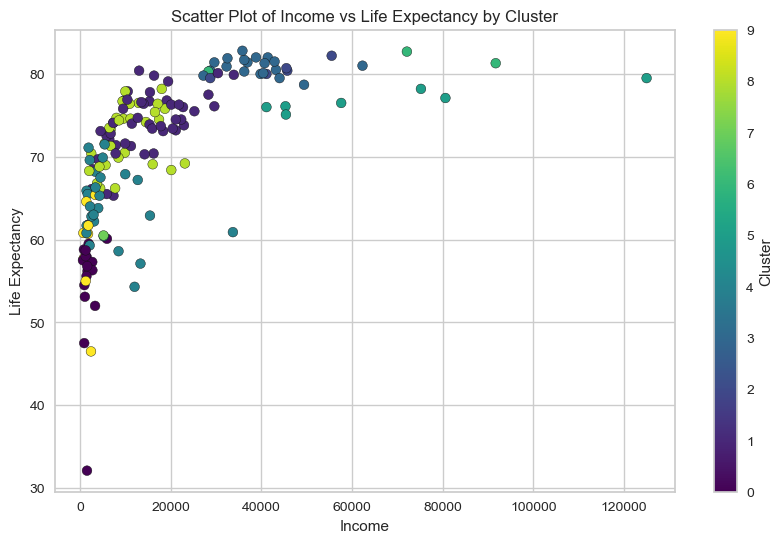

In [12]:
# Plot scatter plot for 'income' vs 'life_expec'
plt.figure(figsize=(10, 6))
plt.scatter(df_features['income'], df_features['life_expec'], c=df_features['Cluster'], cmap='viridis', edgecolor='k')
plt.xlabel('Income')
plt.ylabel('Life Expectancy')
plt.title('Scatter Plot of Income vs Life Expectancy by Cluster')
plt.colorbar(label='Cluster')
plt.show()

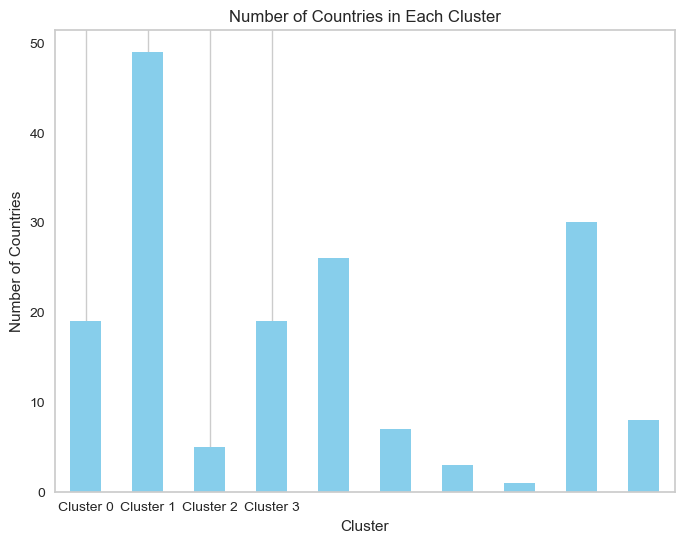

In [13]:
# Histogram of number of countries in each cluster
plt.figure(figsize=(8, 6))
df_features['Cluster'].value_counts().sort_index().plot(kind='bar', color='skyblue')
plt.xlabel('Cluster')
plt.ylabel('Number of Countries')
plt.title('Number of Countries in Each Cluster')
plt.xticks(ticks=range(best_n_clusters), labels=[f'Cluster {i}' for i in range(best_n_clusters)], rotation=0)
plt.grid(axis='y')
plt.show()

In [14]:
# Print out the names of the countries within each cluster
for cluster in range(best_n_clusters):
    countries = df_country[df_features['Cluster'] == cluster]['country'].tolist()
    print(f"Cluster {cluster}: {countries}")

Cluster 0: ['Afghanistan', 'Angola', 'Benin', 'Burkina Faso', 'Cameroon', 'Central African Republic', 'Chad', 'Congo, Dem. Rep.', "Cote d'Ivoire", 'Guinea', 'Guinea-Bissau', 'Haiti', 'Malawi', 'Mali', 'Mozambique', 'Niger', 'Togo', 'Uganda', 'Zambia']
Cluster 1: ['Albania', 'Antigua and Barbuda', 'Bahamas', 'Barbados', 'Belarus', 'Belize', 'Bhutan', 'Bosnia and Herzegovina', 'Bulgaria', 'Cambodia', 'Cape Verde', 'Chile', 'Costa Rica', 'Croatia', 'Cyprus', 'Czech Republic', 'El Salvador', 'Estonia', 'Fiji', 'Georgia', 'Grenada', 'Guyana', 'Hungary', 'Jordan', 'Kyrgyz Republic', 'Latvia', 'Lebanon', 'Libya', 'Lithuania', 'Macedonia, FYR', 'Malaysia', 'Maldives', 'Mauritius', 'Moldova', 'Montenegro', 'Panama', 'Paraguay', 'Poland', 'Romania', 'Serbia', 'Seychelles', 'Slovak Republic', 'South Korea', 'St. Vincent and the Grenadines', 'Suriname', 'Thailand', 'Tunisia', 'Ukraine', 'Vietnam']
Cluster 2: ['Belgium', 'Ireland', 'Netherlands', 'Slovenia', 'Switzerland']
Cluster 3: ['Australia', 